<a href="https://colab.research.google.com/github/Lazar186/Borisovik/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [1]:
!pip install pandas scikit-learn seaborn scipy

In [2]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [3]:
# Загрузка набора данных
df = pd.read_csv('/content/heart_disease (1).csv')

In [4]:
df

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [5]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: age
колонка: sex
колонка: chest pain type
колонка: resting blood pressure
колонка: serum cholestoral in mg/dl      
колонка: fasting blood sugar > 120 mg/dl 
колонка: resting electrocardiographic results
колонка: maximum heart rate achieved  
колонка: exercise induced angina    
колонка: oldpeak 
колонка: slope of peak
колонка: number of major vessels 
колонка: thal
колонка: Disease


Описание каждого признака

1) Age (Возраст):
Возраст пациента (в годах).
Признак, который может влиять на предрасположенность к сердечно-сосудистым заболеваниям (заболевания чаще встречаются у людей старшего возраста).

2) Sex (Пол):
Пол пациента: обычно кодируется как 1 = мужчина, 0 = женщина.
Пол также влияет на риск сердечных заболеваний (например, мужчины более подвержены риску в определённых возрастах).

3) Chest pain type (Тип боли в груди):
Характеристика боли в груди, связанной с сердцем:
1 = типичная стенокардия (ангинозная боль);
2 = атипичная стенокардия;
3 = боль, не связанная с сердцем;
4 = бессимптомная.
Может быть важным индикатором наличия сердечных заболеваний.

4) Resting blood pressure (Давление в покое):
Артериальное давление пациента в состоянии покоя (в мм рт. ст.).
Повышенное давление связано с риском сердечно-сосудистых заболеваний.

5) Serum cholesterol in mg/dl (Уровень холестерина в сыворотке):
Уровень холестерина в крови (в мг/дл).
Высокий уровень холестерина повышает вероятность заболеваний сердца.

6) Fasting blood sugar > 120 mg/dl (Глюкоза натощак > 120 мг/дл):
Уровень сахара в крови после 8-часового голодания:
1 = больше 120 мг/дл (диабетический уровень);
0 = меньше 120 мг/дл (нормальный уровень).
Диабет или высокий уровень сахара в крови увеличивают риск сердечно-сосудистых заболеваний.

7) Resting electrocardiographic results (Результаты электрокардиографии в покое):
Результаты ЭКГ в состоянии покоя:
0 = нормальные;
1 = наличие отклонений (например, блокады левой ножки пучка Гиса);
2 = наличие значительных отклонений (вероятные признаки гипертрофии желудочка и т.д.).

8) Maximum heart rate achieved (Максимальная достигнутая частота сердечных сокращений):
Максимальная ЧСС, достигнутая при нагрузке.
Низкий максимальный показатель ЧСС может указывать на снижение физической выносливости и риск заболеваний.

9) Exercise induced angina (Ангинозная боль, вызванная физической нагрузкой):
Является ли боль в груди вызванной физической нагрузкой:
1 = да;
0 = нет.
Индикатор наличия ишемической болезни сердца.

10) Oldpeak (Депрессия ST сегмента на ЭКГ):
Изменение уровня ST сегмента относительно покоя (в мм).
Может быть связано с ишемией миокарда.

11) Slope of peak (Форма наклона ST сегмента):
Наклон ST сегмента на пике нагрузки:
1 = восходящий (норма);
2 = горизонтальный (возможная ишемия);
3 = нисходящий (патология).

12) Number of major vessels (Количество крупных сосудов):
Количество крупных сосудов (от 0 до 3), окрашенных флюороскопией.
Это ключевой показатель состояния кровотока в коронарных сосудах.

13) Thal (Талассемия или её тип):
Состояние талассемии:
3 = нормальное;
6 = фиксированный дефект (возможная ишемия);
7 = обратимый дефект (возможная ишемия).

14) Disease (Наличие заболевания):
Целевая переменная:
1 = болезнь сердца присутствует;
0 = болезнь сердца отсутствует.
Это основной результат, который анализируется и предсказывается.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral in mg/dl            270 non-null    int64  
 5   fasting blood sugar > 120 mg/dl       270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   maximum heart rate achieved           270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  slope of peak                         270 non-null    int64  
 11  number of major ves

3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [7]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              0
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 0
dtype: int64


In [9]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'Disease'] = np.nan

In [10]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              0
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 5
dtype: int64


In [11]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              0
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 0
dtype: int64


In [16]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.Disease = df_median.Disease.fillna(df_median.Disease.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              0
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 0
dtype: int64


In [17]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.Disease = df_mean.Disease.fillna(df_median.Disease.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              0
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 0
dtype: int64


⏰ Заполнение категориальных признаков происходит с помощью ```df.category_variable.mode() (как один из вариантов, хотя и считается недостаточно хорошим).```

Как вариант - можно использовать KNN (K-ближайших соедей)

4. **Выбираем целвую переменную**

⏰ В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

```В моем датасете была выбрана целевая переменная is_best_wine -> которая была преобразована из quality (если качество >= 7, то вино считается лучшим, иначе не лучшее)```

In [18]:
# Удаляем лишние пробелы в названиях столбцов
df.columns = df.columns.str.strip()

# Теперь можно работать с данными, например, с 'maximum heart rate achieved'
df['is_critical_condition'] = np.where(
    (df['resting blood pressure'] > 140) |
    (df['maximum heart rate achieved'] < 100) |
    (df['exercise induced angina'] == 1) |
    (df['serum cholestoral in mg/dl'] > 240) |
    (df['oldpeak'] > 2.5),
    1,  # Критическое состояние
    0   # Состояние некритическое
).astype(int)

# Проверка первых строк
print(df[['resting blood pressure',
          'maximum heart rate achieved',
          'exercise induced angina',
          'serum cholestoral in mg/dl',
          'oldpeak',
          'is_critical_condition']].head())


   resting blood pressure  maximum heart rate achieved  \
0                     130                          109   
1                     115                          160   
2                     124                          141   
3                     128                          105   
4                     120                          121   

   exercise induced angina  serum cholestoral in mg/dl  oldpeak  \
0                        0                         322      2.4   
1                        0                         564      1.6   
2                        0                         261      0.3   
3                        1                         263      0.2   
4                        1                         269      0.2   

   is_critical_condition  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  


In [19]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral in mg/dl', 'fasting blood sugar > 120 mg/dl',
       'resting electrocardiographic results', 'maximum heart rate achieved',
       'exercise induced angina', 'oldpeak', 'slope of peak',
       'number of major vessels', 'thal', 'Disease', 'is_critical_condition'],
      dtype='object')

In [22]:
# Целевая переменная (критическое состояние)
Y = df['is_critical_condition']  # выбираем целевую переменную

# Переменные для проверки влияния (дропаем 'is_critical_condition' и 'Disease')
X = df.drop(['is_critical_condition', 'Disease'], axis=1)  # удаляем обе целевые переменные

# Проверка
print(X.head())
print(Y.head())


   age  sex  chest pain type  resting blood pressure  \
0   70    1                4                     130   
1   67    0                3                     115   
2   57    1                2                     124   
3   64    1                4                     128   
4   74    0                2                     120   

   serum cholestoral in mg/dl  fasting blood sugar > 120 mg/dl  \
0                         322                                0   
1                         564                                0   
2                         261                                0   
3                         263                                0   
4                         269                                0   

   resting electrocardiographic results  maximum heart rate achieved  \
0                                     2                          109   
1                                     2                          160   
2                                     0           

5. **Графический анализ**

In [23]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


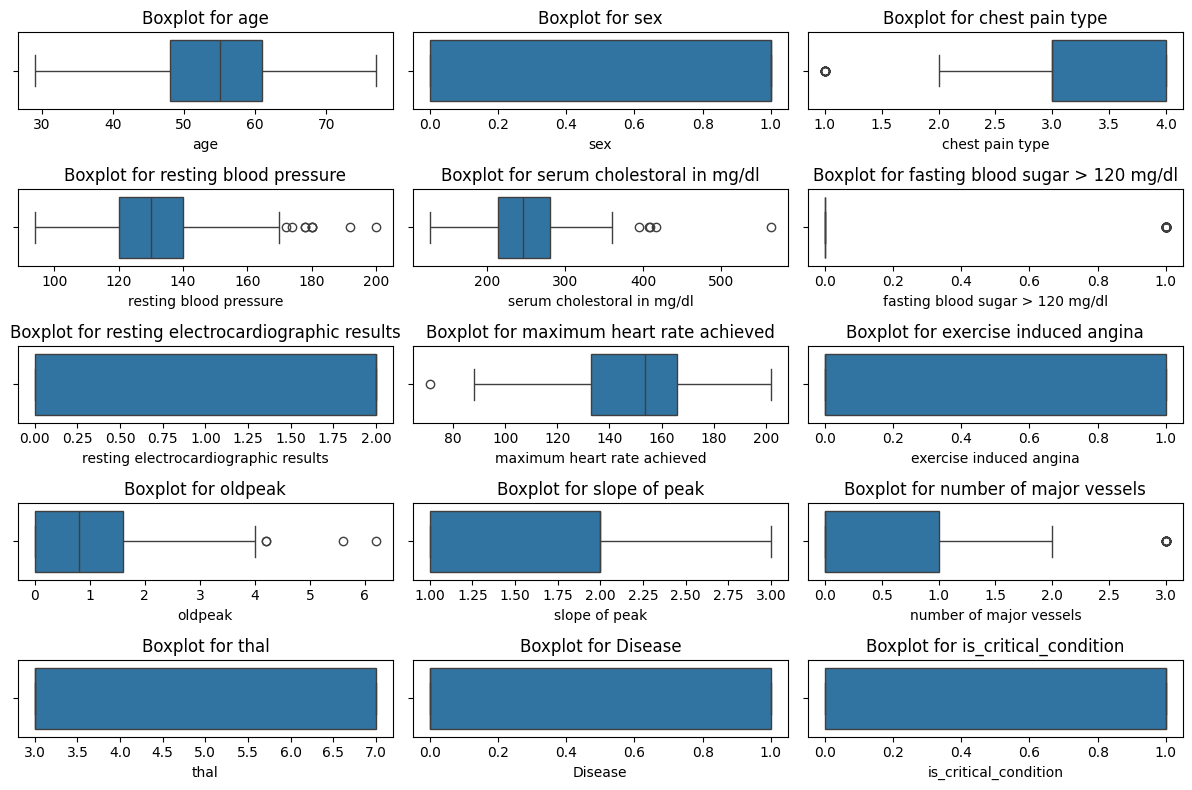

In [25]:
# Настроим размер графиков
plt.figure(figsize=(12, 8))

# Пройдем по всем числовым столбцам в DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Рассчитаем количество строк и колонок для подграфиков
num_columns = 3  # Количество колонок для подграфиков
num_rows = np.ceil(len(numerical_columns) / num_columns).astype(int)  # Рассчитываем количество строк

# Построение boxplot для каждой числовой переменной
for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_columns, i+1)  # Динамическое распределение по строкам и колонкам
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.tight_layout()

plt.show()


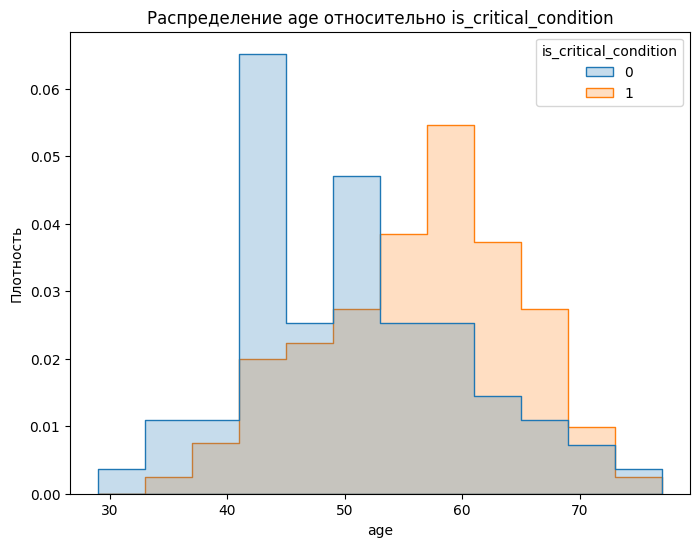

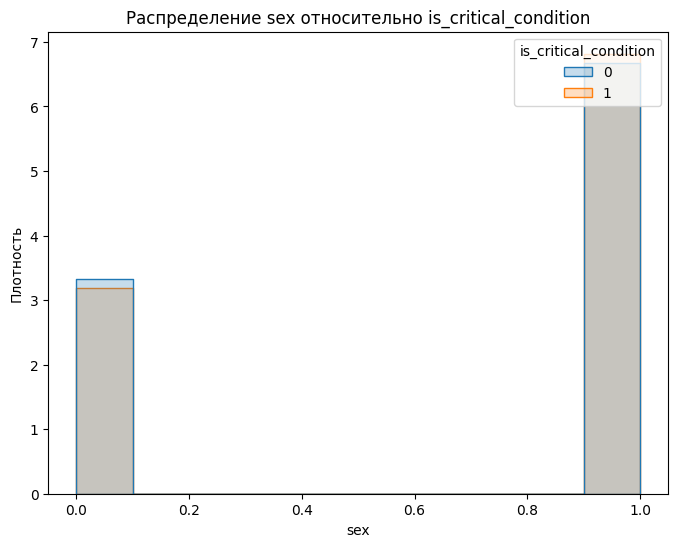

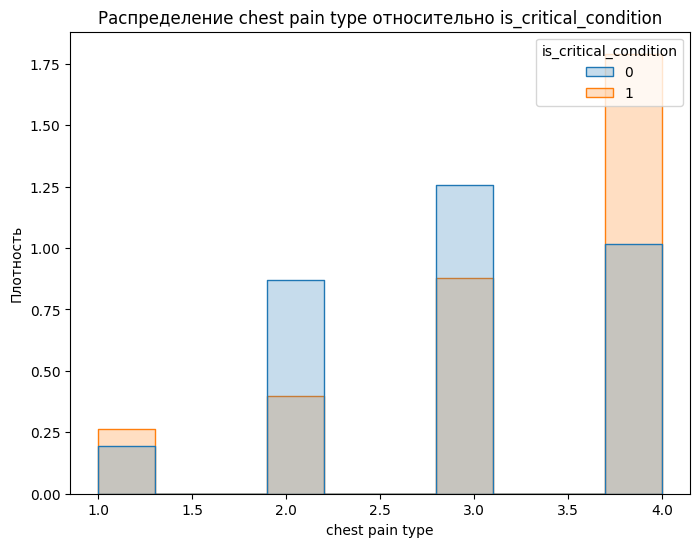

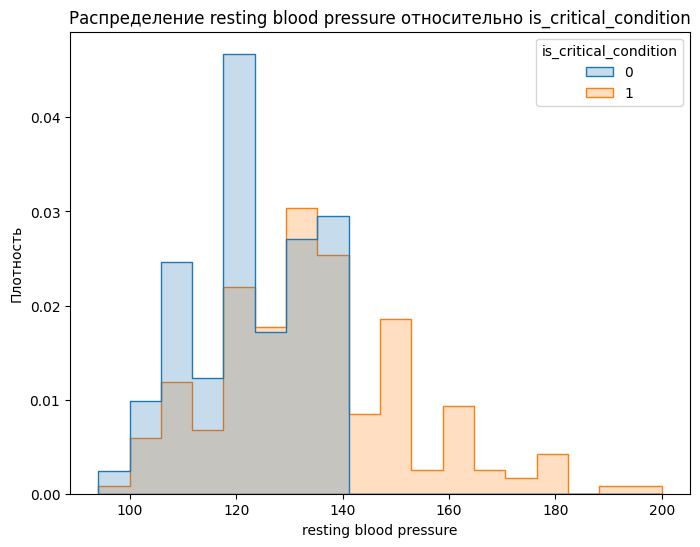

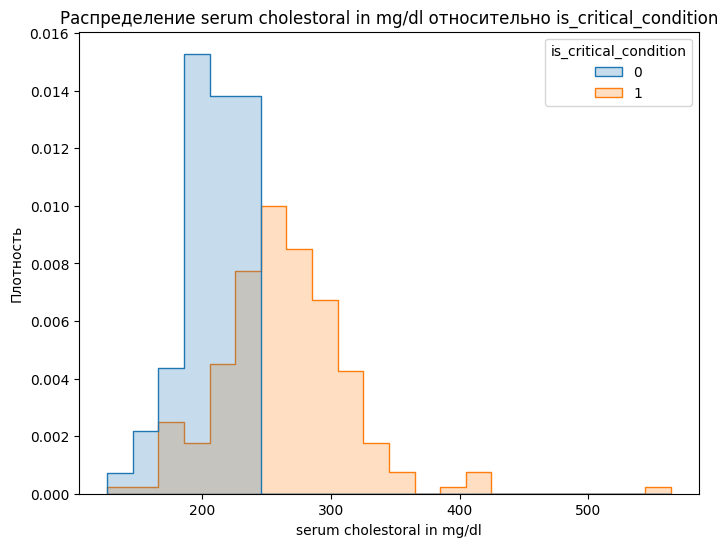

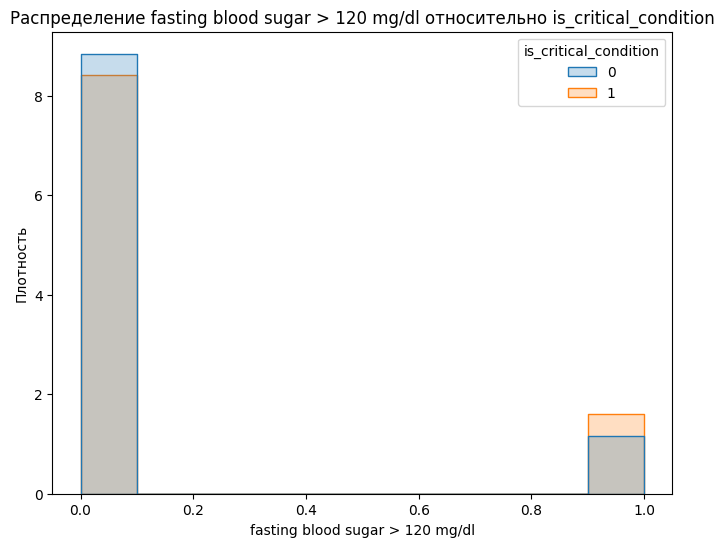

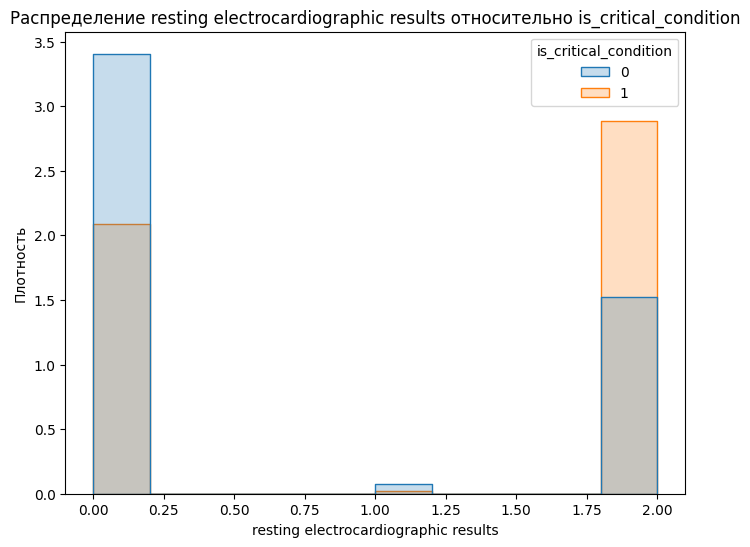

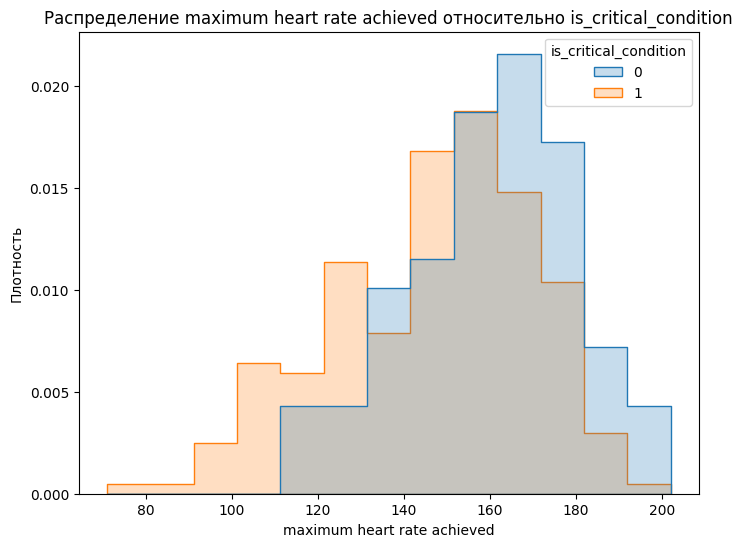

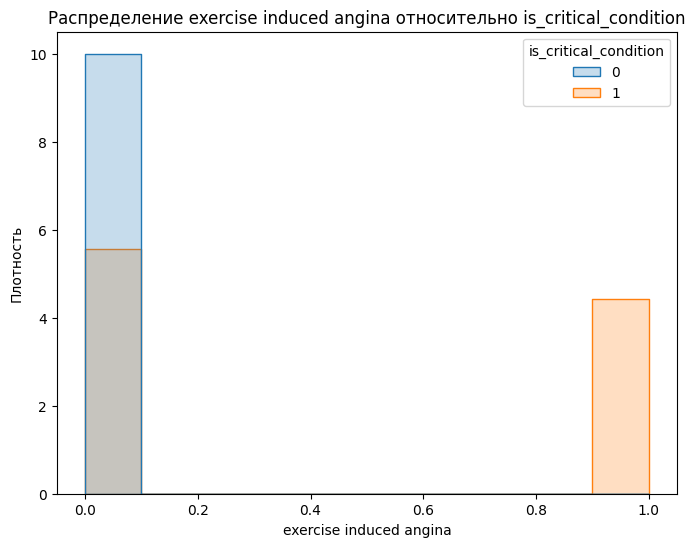

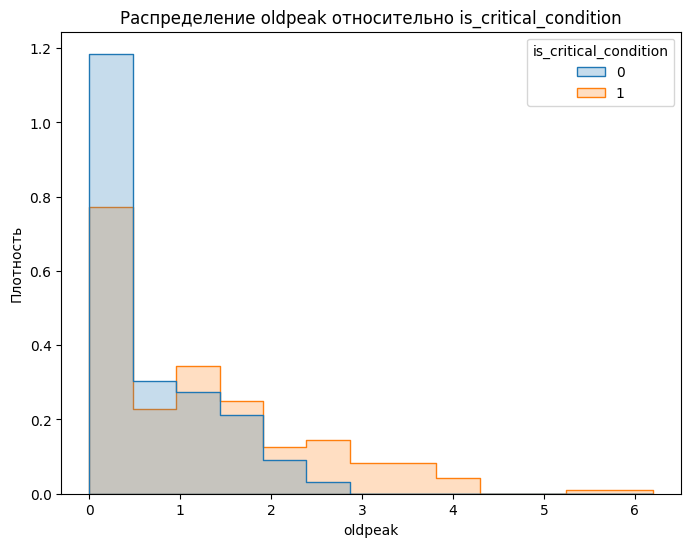

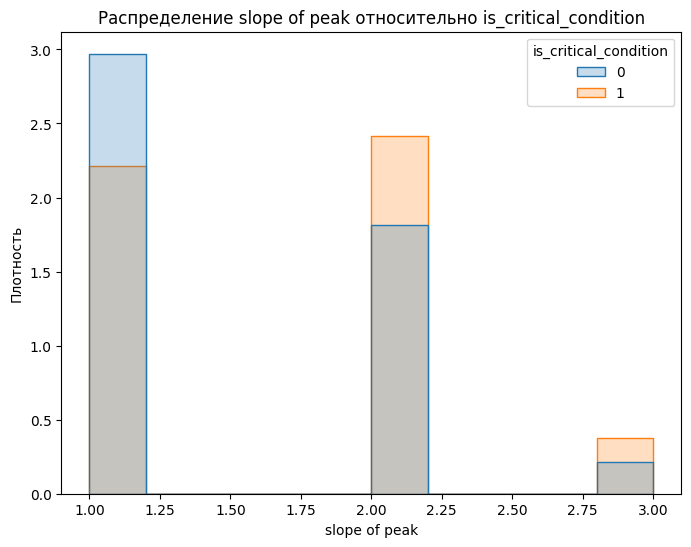

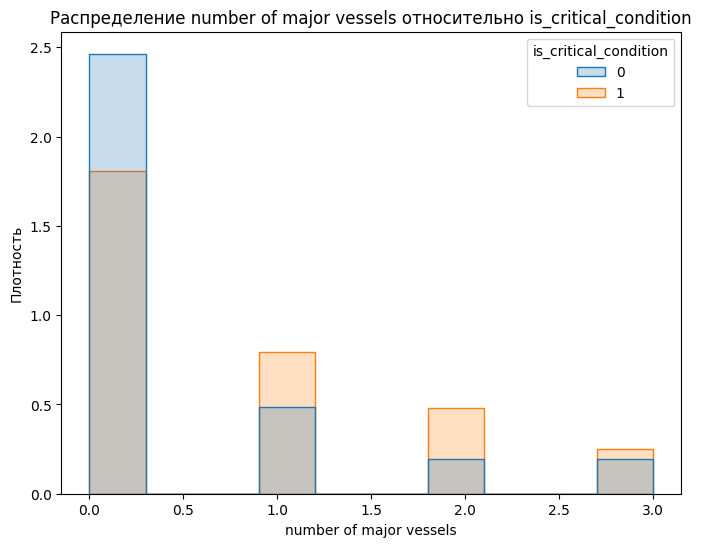

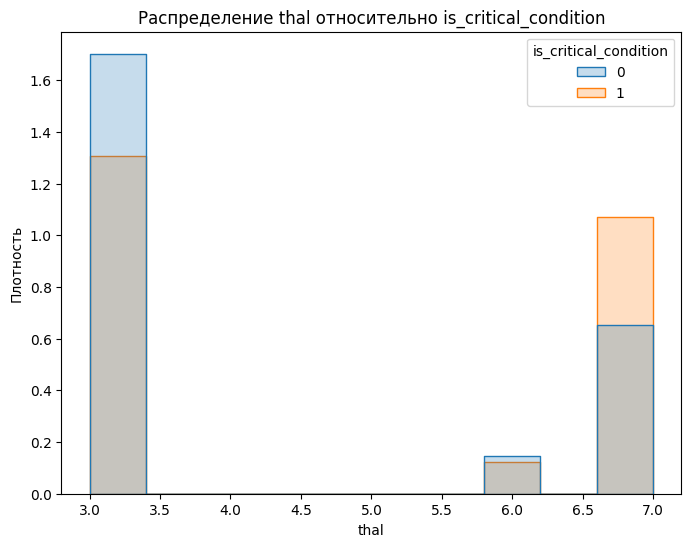

In [26]:
# Построение диаграмм распределения для каждой числовой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='is_critical_condition', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно is_critical_condition')
    plt.xlabel(col)
    plt.ylabel('Плотность')
    plt.show()


1) age - Выборка 25-80 лет, (58-62 группа риска)

2) sex - Мужчин больше почти в 2 раза тем женщин (Состояние не зависит от пола)

3) chest pain type - Боль в груди в основном не связана с сердцем (т.к. 3-4 преобладают, однако это всё равно группа риска)

4) resting blood pleasure - Артериальное давление от 80 до 200 (группа риска 130-140)

5) serum cholestoral - Холостерин от 100 до 450 мг/дл (группа риска 250-275 мг/дл)

6) fasting blood sugar - Чаще проблемы с сахаром, это один из симптомов болезни

7) resting ECG result - В равной степени ЭКГ норма (0) и критическое сотояние (2) (крит состояние - группа риска)

8) max heart rate achieved - от 75 до 200 ударов/мин (152-162 уд/мин группа риска)

9) exercide induce angina - При боли в груди из-за физ нагрузки - группа риска

10) Депрессия ST сегмента на ЭКГ (признак ишемии наивысший у самого маленького кол-ва людей, в основном признак отсутсвует)

11) при 2 признак ишемии, при 3 патология (Патолигий минимум, ишемия и её отсутсвие в равной степени, и паталогия и ишемия - группа риска)

12) 0 норма, повышение ведёт к сердечным заболеваниям (показатель 0 преобладает, 1, 2 и 3 примерно в равной степени и всё группа риска)

13) 6 и 7 дефекты, но преобладает 3, норма (при 7, группа риска)

In [29]:
# Создаем копию исходного DataFrame
df_cat = df.copy()

# Преобразуем числовые признаки в категориальные
df_cat['age_category'] = pd.cut(df_cat['age'], bins=[0, 40, 60, 100], labels=['young', 'middle-aged', 'old'])
df_cat['blood_pressure_category'] = pd.cut(df_cat['resting blood pressure'], bins=[0, 120, 140, 200], labels=['normal', 'elevated', 'high'])
df_cat['cholesterol_category'] = pd.cut(df_cat['serum cholestoral in mg/dl'], bins=[0, 200, 240, 400], labels=['normal', 'borderline-high', 'high'])
df_cat['max_heart_rate_category'] = pd.cut(df_cat['maximum heart rate achieved'], bins=[0, 100, 150, 250], labels=['low', 'average', 'high'])
df_cat['oldpeak_category'] = pd.cut(df_cat['oldpeak'], bins=[-1, 0, 2, 5], labels=['no_change', 'moderate', 'severe'])

# Преобразуем бинарные признаки в категориальные
df_cat['sex_category'] = df_cat['sex'].map({0: 'female', 1: 'male'})
df_cat['fasting_blood_sugar_category'] = df_cat['fasting blood sugar > 120 mg/dl'].map({0: 'normal', 1: 'high'})
df_cat['exercise_angina_category'] = df_cat['exercise induced angina'].map({0: 'no', 1: 'yes'})

# Оставляем категориальные версии переменных с явными группами
categorical_columns = [
    'age_category', 'blood_pressure_category', 'cholesterol_category',
    'max_heart_rate_category', 'oldpeak_category', 'sex_category',
    'fasting_blood_sugar_category', 'exercise_angina_category'
]

# Отображаем преобразованные данные
df_cat[categorical_columns].head()


,age_category,blood_pressure_category,cholesterol_category,max_heart_rate_category,oldpeak_category,sex_category,fasting_blood_sugar_category,exercise_angina_category
0,old,elevated,high,average,severe,male,normal,no
1,old,normal,NaN,high,moderate,female,normal,no
2,middle-aged,elevated,high,average,moderate,male,normal,no
3,old,elevated,high,average,moderate,male,normal,yes
4,old,normal,high,average,moderate,female,normal,yes


### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

Описание категориальных признаков вашего датасета:

index:
Индекс строки, уникальный идентификатор каждой записи.

age_category (Категория возраста):
Категориальный признак, характеризующий возраст пациента.
Возможные значения:
old: пожилой.
middle-aged: средний возраст.

blood_pressure_category (Категория артериального давления):
Категориальный признак, характеризующий уровень артериального давления.
Возможные значения:
normal: нормальное давление.
elevated: повышенное давление.

cholesterol_category (Категория уровня холестерина):
Категориальный признак, показывающий уровень холестерина в крови.
Возможные значения:
high: высокий уровень холестерина.
NaN: отсутствуют данные.

max_heart_rate_category (Категория максимального сердечного ритма):
Категориальный признак, характеризующий достигнутую максимальную частоту сердечных сокращений.
Возможные значения:
high: высокий.
average: средний.

oldpeak_category (Категория ST-депрессии):
Категориальный признак, указывающий изменение уровня ST сегмента на ЭКГ.
Возможные значения:
moderate: умеренное.
severe: выраженное.

sex_category (Категория пола):
Пол пациента.
Возможные значения:
male: мужчина.
female: женщина.

fasting_blood_sugar_category (Категория уровня сахара в крови натощак):
Категориальный признак, характеризующий уровень сахара в крови после 8-часового голодания.
Возможные значения:
normal: нормальный уровень.
exercise_angina_category (Категория стенокардии при физической нагрузке):

Категориальный признак, показывающий наличие стенокардии, вызванной физической нагрузкой.
Возможные значения:
yes: да.
no: нет.

In [30]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('is_critical_condition')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для age:

                       count       mean       std   min   25%   50%   75%  \
is_critical_condition                                                       
0                       69.0  50.000000  9.611574  29.0  43.0  50.0  56.0   
1                      201.0  55.955224  8.431073  35.0  51.0  57.0  62.0   

                        max  
is_critical_condition        
0                      76.0  
1                      77.0  


Описательная статистика для sex:

                       count      mean       std  min  25%  50%  75%  max
is_critical_condition                                                    
0                       69.0  0.666667  0.474858  0.0  0.0  1.0  1.0  1.0
1                      201.0  0.681592  0.467022  0.0  0.0  1.0  1.0  1.0


Описательная статистика для chest pain type:

                       count      mean       std  min  25%  50%  75%  max
is_critical_condition                                                    
0        

In [47]:
print("\nКатегориальные переменные:")
df_cat


Категориальные переменные:


,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,...,Disease,is_critical_condition,age_category,blood_pressure_category,cholesterol_category,max_heart_rate_category,oldpeak_category,sex_category,fasting_blood_sugar_category,exercise_angina_category
0,70,1,4,130,322,0,2,109,0,2.4,...,1,1,old,elevated,high,average,severe,male,normal,no
1,67,0,3,115,564,0,2,160,0,1.6,...,0,1,old,normal,NaN,high,moderate,female,normal,no
2,57,1,2,124,261,0,0,141,0,0.3,...,1,1,middle-aged,elevated,high,average,moderate,male,normal,no
3,64,1,4,128,263,0,0,105,1,0.2,...,0,1,old,elevated,high,average,moderate,male,normal,yes
4,74,0,2,120,269,0,2,121,1,0.2,...,0,1,old,normal,high,average,moderate,female,normal,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,...,0,1,middle-aged,high,normal,high,moderate,male,high,no
266,44,1,2,120,263,0,0,173,0,0.0,...,0,1,middle-aged,normal,high,high,no_change,male,normal,no
267,56,0,2,140,294,0,2,153,0,1.3,...,0,1,middle-aged,elevated,high,high,moderate,female,normal,no
268,57,1,4,140,192,0,0,148,0,0.4,...,0,0,middle-aged,elevated,normal,average,moderate,male,normal,no


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['chest pain type'].plot(kind='hist', bins=20, title='chest pain type')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='sex', y='chest pain type', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='chest pain type', y='resting blood pressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['sex']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('sex')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['chest pain type']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('chest pain type')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['resting blood pressure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('resting blood pressure')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['sex'].plot(kind='line', figsize=(8, 4), title='sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['chest pain type'].plot(kind='line', figsize=(8, 4), title='chest pain type')
plt.gca().spines[['top', 'right']].set_visible(False)

Возраст (age):
Пациенты в критическом состоянии старше (средний возраст ≈ 56 лет) по сравнению с теми, кто не находится в критическом состоянии (средний возраст ≈ 50 лет).

Пол (sex):
Распределение пола схоже между группами, с небольшим преобладанием мужчин (код 1).

Тип боли в груди (chest pain type):
В среднем пациенты с критическим состоянием чаще имеют более высокий тип боли в груди (среднее ≈ 3.26 против 2.93).

Давление в состоянии покоя (resting blood pressure):
У пациентов с критическим состоянием более высокое среднее давление (≈ 134 против ≈ 122).

Уровень холестерина (serum cholesterol):
Уровень холестерина значительно выше у пациентов в критическом состоянии (среднее ≈ 264 против ≈ 207).

Сахар в крови (fasting blood sugar):
У пациентов в критическом состоянии чаще встречается уровень сахара > 120 (15.9% против 11.6%).

Результаты ЭКГ (resting electrocardiographic results):
Среднее значение выше у пациентов в критическом состоянии (≈ 1.16 против ≈ 0.62), что может указывать на более выраженные отклонения.

Максимальная частота пульса (maximum heart rate achieved):
Пациенты в критическом состоянии имеют более низкий средний показатель (≈ 146 против ≈ 160).

Стенокардия при нагрузке (exercise induced angina):
В группе критического состояния значительно больше пациентов с этим состоянием (44.3% против 0%).

Oldpeak (депрессия сегмента ST):
Значения выше у пациентов в критическом состоянии (среднее ≈ 1.21 против ≈ 0.58), что связано с ишемическими изменениями.

Наклон пика (slope of peak):
Пациенты в критическом состоянии имеют немного выше средний показатель (≈ 1.63 против ≈ 1.45).

Количество крупных сосудов (number of major vessels):
У пациентов в критическом состоянии выше среднее значение (≈ 0.75 против ≈ 0.43), что может быть связано с ухудшением кровотока.

Thal:
У пациентов в критическом состоянии среднее значение выше (≈ 4.86 против ≈ 4.21), что может указывать на больший риск.

Основные выводы:
Пациенты в критическом состоянии имеют более высокие значения ключевых маркеров риска (возраст, давление, уровень холестерина, признаки ишемии), что подтверждает важность этих переменных в прогнозировании состояния здоровья.
Некоторые категории, такие как "стенокардия при нагрузке" и "oldpeak", показывают четкие различия между группами.

## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [33]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease,is_critical_condition
age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322,0.285686
sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721,0.013930
chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436,0.152318
resting blood pressure,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383,0.298993
serum cholestoral in mg/dl,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021,0.479043
fasting blood sugar > 120 mg/dl,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319,0.053117
resting electrocardiographic results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091,0.234725
maximum heart rate achieved,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514,-0.259717
exercise induced angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303,0.410849
oldpeak,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967,0.238825


2. ⏰ **Интерпретируйте результаты:**


### Интерпретация:
- **Коэффициент корреляции Пирсона** показывает степень линейной связи между двумя переменными.

### Описание корреляций для значимых признаков:



1. **Alcohol и Quality (0.444)**:
   - Есть умеренная положительная корреляция между содержанием алкоголя и качеством вина. Это указывает на то, что вина с более высоким содержанием алкоголя чаще оцениваются выше. Этот признак может быть значимым для прогнозирования качества вина, поскольку он имеет достаточно сильную связь с целевой переменной.

2. **Alcohol и is_best_wine (0.390)**:
   - Похожая корреляция наблюдается между содержанием алкоголя и принадлежностью вина к категории лучших (is_best_wine). Более высокое содержание алкоголя коррелирует с вероятностью, что вино будет оценено как "лучшее".

3. **Quality и is_best_wine (0.759)**:
   - Как и ожидалось, очень высокая корреляция между качеством вина и принадлежностью к категории лучших вин. Это обусловлено тем, что признак `is_best_wine` напрямую основан на значении `quality`.

4. **Total Sulfur Dioxide и Free Sulfur Dioxide (0.720)**:
   - Высокая корреляция между общим и свободным диоксидом серы. Это вполне ожидаемо, так как общий диоксид серы включает в себя свободную и связанную формы. В этом случае один из признаков может быть исключен для предотвращения избыточности информации в модели.

5. **Residual Sugar и Density (0.553)**:
   - Средняя положительная корреляция между остаточным сахаром и плотностью вина. Более высокое содержание остаточного сахара увеличивает плотность вина, что логично, так как сахар увеличивает массу раствора. Этот признак также может вызвать мультиколлинеарность.

6. **Density и Alcohol (-0.687)**:
   - Сильная отрицательная корреляция между плотностью и содержанием алкоголя. Вина с высоким содержанием алкоголя имеют меньшую плотность, что объясняется физическими свойствами спирта. Это важно учитывать при построении моделей, чтобы избежать мультиколлинеарности.

7. **Alcohol и Density (-0.686)**:
   - Как уже упоминалось, это значительная отрицательная корреляция. В этом случае, возможно, стоит исключить один из этих признаков для предотвращения мультиколлинеарности.

### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [35]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['age', 'sex', 'chest pain type', 'resting blood pressure', 'serum cholestoral in mg/dl', 'fasting blood sugar > 120 mg/dl', 'resting electrocardiographic results', 'maximum heart rate achieved', 'exercise induced angina', 'slope of peak', 'number of major vessels', 'thal']


In [36]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [37]:
X_processed

,oldpeak,age_34,age_35,age_37,age_38,age_39,age_40,age_41,age_42,age_43,...,maximum heart rate achieved_195,maximum heart rate achieved_202,exercise induced angina_1,slope of peak_2,slope of peak_3,number of major vessels_1,number of major vessels_2,number of major vessels_3,thal_6,thal_7
0,2.4,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,1.6,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0.3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.2,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,True
4,0.2,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
266,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
267,1.3,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
268,0.4,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [38]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['oldpeak']


In [39]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [40]:
X_processed

,oldpeak,age_34,age_35,age_37,age_38,age_39,age_40,age_41,age_42,age_43,...,maximum heart rate achieved_195,maximum heart rate achieved_202,exercise induced angina_1,slope of peak_2,slope of peak_3,number of major vessels_1,number of major vessels_2,number of major vessels_3,thal_6,thal_7
0,0.387097,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,0.258065,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0.048387,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.032258,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,True
4,0.032258,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.080645,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
266,0.000000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
267,0.209677,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
268,0.064516,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [41]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [42]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9815
Точность на тестовой выборке: 0.7407

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.50      0.43      0.46        14
           1       0.81      0.85      0.83        40

    accuracy                           0.74        54
   macro avg       0.65      0.64      0.65        54
weighted avg       0.73      0.74      0.73        54



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [43]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


                             Feature  Coefficient
326        exercise induced angina_1     2.371807
120   serum cholestoral in mg/dl_204    -1.186431
114   serum cholestoral in mg/dl_197    -1.002882
77        resting blood pressure_150     0.937825
7                             age_41    -0.891325
..                               ...          ...
153   serum cholestoral in mg/dl_237     0.000000
249  maximum heart rate achieved_113     0.000000
170   serum cholestoral in mg/dl_257     0.000000
156   serum cholestoral in mg/dl_242     0.000000
271  maximum heart rate achieved_137     0.000000

[334 rows x 2 columns]


**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания лучших вин.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Содержание алкоголя и сульфатов положительно влияют на качество.**
  - **Плотность и летучая кислотность отрицательно влияют на качество.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [44]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.8000
Отклонение точности: 0.0460


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

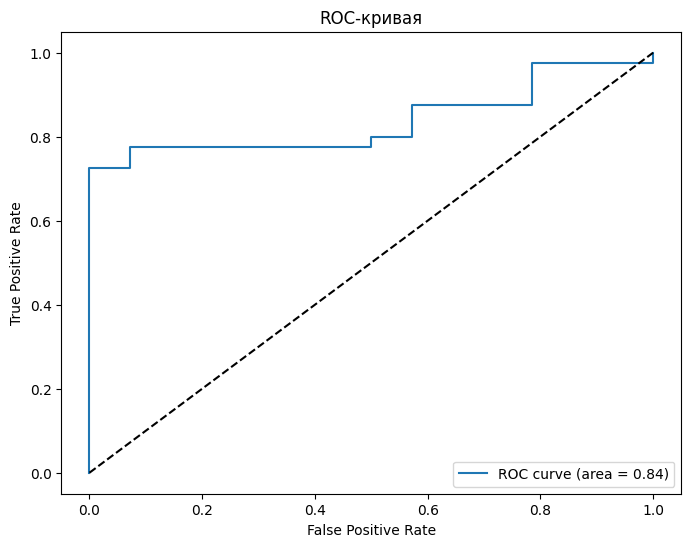

In [46]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---